In [1]:
import numpy as np   # Importo paquete de álgebra lineal
import matplotlib.pyplot as plt   # Importo paquete de gráficos
import math   # Importo paquete de funciones matemáticas
import random   # Importo paquete para generar números pseudoaleatorios

## Problema 8

Evalúe, utilizando los métodos de Euler, de Heun y de Runge Kutta de cuarto orden, la ecuación diferencial:
\begin{equation}
\frac{dy}{dx} = 4 e^{0,8 x} - 0,5 y
\end{equation}
, con la condición de contorno $y(0) = 2$, desde $x = 0$ hasta $x = 4$, con varios tamaños de paso.

- Compare la exactitud de los diferentes métodos con el resultado exacto en $x = 4$.
- Grafique este error en función del esfuerzo de cálculo realizado (cantidad de veces que tuvo que evaluar la función).
- Compare las soluciones numéricas obtenidas, $y(x)$, con la solución teórica.

\begin{equation}
y(x) = \frac{4}{1,3} \left(e^{0,8 x} - e^{-0,5 x}\right) + 2 e^{-0,5 x}
\end{equation}

In [2]:
# Defino la ecuación diferencial a resolver.
def F(x,y):
    ecdif = 4*np.exp(0.8*x) - 0.5*y
    
    return ecdif

In [3]:
# Defino solución teórica de la ecuación diferencial a resolver.
def teo(x):
    TEO = (4/1.3)*(np.exp(0.8*x) - np.exp(-0.5*x)) + 2*np.exp(-0.5*x)
    
    return TEO

In [4]:
# Defino solución de un paso por el método de EULER.
def paso_EU(h,xo,yo,ED):
    """
    Parámetros:
    ===========
    h = Tamaño de paso
    xo = Posición inicial
    yo = Condición inicial
    ED = Función característica de la ecuación diferencial
    
    Retorna:
    ========
    Valor de la solución en x+h
    """
    
    return yo + h*ED(xo, yo)

In [5]:
# Defino solución de un paso por el método de HEUN.
def paso_HE(h,xo,yo,ED):
    """
    Parámetros:
    ===========
    h = Tamaño de paso
    xo = Posición inicial
    yo = Condición inicial
    ED = Función característica de la ecuación diferencial
    
    Retorna:
    ========
    Valor de la solución en x+h
    """
    y_1_2 = yo + h*ED(xo, yo)/2
    
    return yo + h*ED(xo + h/2, y_1_2)

In [6]:
# Defino solución de un paso por el método de RUNGE-KUTTA ORDEN 4.
def paso_RK(h,xo,yo,ED):
    """
    Parámetros:
    ===========
    h = Tamaño de paso
    xo = Posición inicial
    yo = Condición inicial
    ED = Función característica de la ecuación diferencial
    
    Retorna:
    ========
    Valor de la solución en x+h
    """
    K1 = ED(xo, yo)
    K2 = ED(xo + 0.5*h, yo + 0.5*K1*h)
    K3 = ED(xo + 0.5*h, yo + 0.5*K2*h)
    K4 = ED(xo + h, yo + K3*h)
    
    return yo + h*(K1 + 2*K2 + 2*K3 + K4)/6

In [7]:
# Defino motor de solución para la ecuación diferencial "func" en el intervalo "[xo,xf]".
def dfsolve(N,xo=0,xf=4,yo=2,func=F,method=paso_EU):
    """
    Parámetros:
    ===========
    N = Número de subintervalos en los que se dividirá el intervalo [xo,xf]
    xo = Límite inferior del intervalo (se definió =0 por defecto)
    xf = Límite superior del intervalo (se definió =4 por defecto)
    yo = Condición inicial (se definió =2 por defecto)
    func = Función característica de la ecuación diferencial
    method = Método de resolución de la ecuación diferencial (se definió el método de resolución de EULER por defecto)
    
    Retorna:
    ========
    X = Vector de las posiciones donde se resolvió la ecuación
    SOL = Valores de Y con la solución encontrada
    """
    # Divido el intervalo "[xo,xf]" en "N" subintervalos.
    X = np.linspace(xo,xf,N+1)
    
    # Calculo el tamaño de paso "h".
    h = (xf-xo)/N
    
    # Defino el vector "SOL", comenzando por la solución asociada a "xo", que es "yo".
    SOL = [yo]
    
    # Completo el vector "SOL". Recorro hasta el penúltimo elemento de "X", porque como en "method" llamo a la resolución del
    # paso de algún método de resolución, ya me considera el valor de "X" posterior.
    for i, x in enumerate(X[:-1]):
        SOL.append(
        method(h, x, SOL[-1], func)
        )
    
    return X, SOL

In [8]:
# Defino función que calcula error relativo.
def error(valteo,valaprox):
    
    return np.abs((valteo-valaprox)/valteo)

## Comparación entre métodos, con N fijo

In [9]:
# Defino límite inferior del intervalo.
xo = 0

# Defino límite superior del intervalo.
xf = 4

# Defino condición inicial.
yo = 2

# Defino número de subintervalos en los que se dividirá el intervalo "[xo,xf]".
N = 4

In [10]:
# Defino número de subintervalos en los que se dividirá el intervalo "[xo,xf]".
# N = 5

# Calculo el tamaño de paso "h".
# h = (xf-xo)/N

# Pruebo EULER a ver si anda el paso.
# pruebaEU = paso_EU(h, xo, yo, F)
# print(pruebaEU)

# Pruebo RK a ver si anda el paso.
# pruebaRK = paso_RK(h, xo, yo, F)
# print(pruebaRK)

In [11]:
# Resuelvo por método de EULER.
xeu, yeu = dfsolve(N, xo, xf, yo, F, paso_EU)

In [12]:
# Resuelvo por método de HEUN.
xhe, yhe = dfsolve(N, xo, xf, yo, F, paso_HE)

In [13]:
# Resuelvo por método de RK.
xrk, yrk = dfsolve(N, xo, xf, yo, F, paso_RK)

Text(0.5, 1.0, 'Comparación entre métodos')

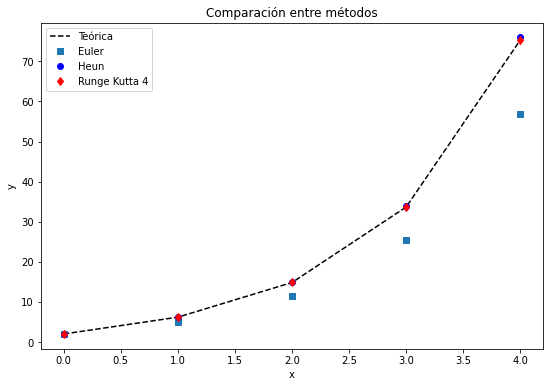

In [14]:
# Grafico
plt.figure(figsize=(9,6))
plt.plot(xeu,teo(xeu),'--k',label='Teórica')
plt.plot(xeu,yeu,'s',label='Euler')
plt.plot(xhe,yhe,'ob',label='Heun')
plt.plot(xrk,yrk,'dr',label='Runge Kutta 4')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación entre métodos')

## Encuentro el mejor intervalo

In [15]:
# Defino diferentes valores "N" en los que dividiré el subintervalo "[xo,xf]".
N = np.logspace(np.log(2),5,20,dtype=int)
print(N)

[     4      8     14     23     39     67    113    190    321    541
    911   1536   2589   4364   7355  12396  20891  35208  59336 100000]


In [16]:
# Defino función que analiza el error relativo de un método de resolución en particular.
# IMPORTANTE: Si "N" tuviera sólo un elemento, "thisn" sería "N". Si "N" tiene más de un elemento, "thisn" sería CADA UNO de 
# los valores dentro de "N" (los que llamo "then" en esta función).
def analyze_method(thisn,thismethod):
    X, Y = dfsolve(then, xo, xf, yo, F, thismethod)
    err = error(teo(X[-1]), Y[-1])
    
    return {then: {'X':X, 'Y':Y, 'err':err}}

In [17]:
solutions = {'RK':{}, 'HE':{}, 'EU':{}}
for then in N:
    solutions['RK'].update(analyze_method(then,paso_RK))
    solutions['HE'].update(analyze_method(then,paso_HE))
    solutions['EU'].update(analyze_method(then,paso_EU))

In [18]:
# Recolectamos todos los errores que medimos para RK.
errors_RK = [thesol['err'] for then, thesol in solutions['RK'].items()]

In [19]:
# Recolectamos todos los errores que medimos para HE.
errors_HE = [thesol['err'] for then, thesol in solutions['HE'].items()]

In [20]:
# Recolectamos todos los errores que medimos para EU.
errors_EU = [thesol['err'] for then, thesol in solutions['EU'].items()]

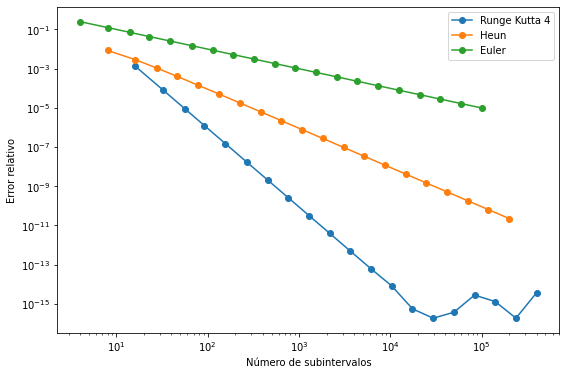

In [21]:
# Grafico los errores relativos en función del número de subintervalos considerados.

# Se grafica en escala "loglog" para expandir toda la información, así los valores de error correspondientes a cantidades
# pequeñas de subintervalos no se superponen.

# Se grafica error de cálculo en función de esfuerzo de cálculo (cantidad de veces que debo evaluar la función para llegar a
# la solución):
    # - RK hace 4*N
    # - HE hace 2*N
    # - EU hace 1*N
# Vemos que a igual esfuerzo de cálculo, RK da menor error, luego HE y luego EU.

plt.figure(figsize=(9,6))
plt.loglog(4*N, errors_RK, '-o', label='Runge Kutta 4')
plt.loglog(2*N, errors_HE, '-o', label='Heun')
plt.loglog(N, errors_EU, '-o', label='Euler')
plt.xlabel('Número de subintervalos')
plt.ylabel('Error relativo')
plt.legend()